<a href="https://colab.research.google.com/github/canxiu-zhang/ML_YUniv/blob/main/ml_1010/group_projects/milestone_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd

categories = ['Action', 'Comedy', 'Drama', 'Thriller', 'Romance']
train = pd.read_csv('train.csv', keep_default_na=False, na_values=[''])
test = pd.read_csv('test.csv', keep_default_na=False, na_values=[''])
avg_wv_train_features = np.loadtxt('avg_wv_train_features.csv', delimiter=',')
avg_wv_test_features = np.loadtxt('avg_wv_test_features.csv', delimiter=',')
x_train_resampled = np.loadtxt('X_train_resampled.csv', delimiter=',')
y_train_resampled = np.loadtxt('y_train_resampled.csv', delimiter=',')

x_train = avg_wv_train_features
x_test = avg_wv_test_features
y_train = train[categories]
y_test = test[categories]

top_50_features = [474, 148, 252, 257, 400, 71, 319, 92, 163, 124, 254, 10, 454, 293, 426, 33, 336, 411, 165, 121, 65, 284, 117, 245, 160, 201, 235, 145, 401, 288, 475, 466, 212, 46, 19, 409, 297, 134, 41, 443, 295, 316, 63, 263, 194, 452, 106, 248, 128, 422]
top_15_features = [90,69,122,190,84,124,99,17,3,286,210,253,241,346,40]
x_train_resampled_selected = x_train_resampled[:, top_50_features]
x_test_selected = x_test[:, top_50_features]

In [3]:
from sklearn.preprocessing import MultiLabelBinarizer
from keras.models import Sequential
from keras.layers import Dense

2023-05-03 23:35:42.185765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Step 2: Preprocess the data
# mlb = MultiLabelBinarizer()
# y_train_resampled = mlb.fit_transform(y_train_resampled)
# y_test = mlb.transform(y_test.values)

In [12]:
y_train_resampled.shape

(32451, 5)

In [13]:
# Step 3: Define the model architecture
model = Sequential()
model.add(Dense(64, input_shape=(50,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='sigmoid'))

In [14]:
# Step 4: Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
# Step 5: Train the model
model.fit(x_train_resampled_selected, y_train_resampled, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
812/812 [==============================] - 3s 2ms/step - loss: 0.6535 - accuracy: 0.2985 - val_loss: 0.8205 - val_accuracy: 0.0860
Epoch 2/50
812/812 [==============================] - 2s 2ms/step - loss: 0.6291 - accuracy: 0.3909 - val_loss: 0.8601 - val_accuracy: 0.1357
Epoch 3/50
812/812 [==============================] - 1s 2ms/step - loss: 0.6210 - accuracy: 0.3506 - val_loss: 0.8543 - val_accuracy: 0.1542
Epoch 4/50
812/812 [==============================] - 1s 2ms/step - loss: 0.6163 - accuracy: 0.3262 - val_loss: 0.8481 - val_accuracy: 0.0724
Epoch 5/50
812/812 [==============================] - 1s 2ms/step - loss: 0.6130 - accuracy: 0.3053 - val_loss: 0.8540 - val_accuracy: 0.0652
Epoch 6/50
812/812 [==============================] - 2s 2ms/step - loss: 0.6099 - accuracy: 0.3027 - val_loss: 0.8557 - val_accuracy: 0.0599
Epoch 7/50
812/812 [==============================] - 2s 2ms/step - loss: 0.6070 - accuracy: 0.2998 - val_loss: 0.8442 - val_accuracy: 0.0410
Epoch 

In [17]:
# Step 6: Evaluate the model on the test set
scores = model.evaluate(x_test_selected, y_test)
print("Test accuracy:", scores[1])

102/102 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.3567
Test accuracy: 0.35674846172332764


102/102 [==============================] - 0s 1ms/step


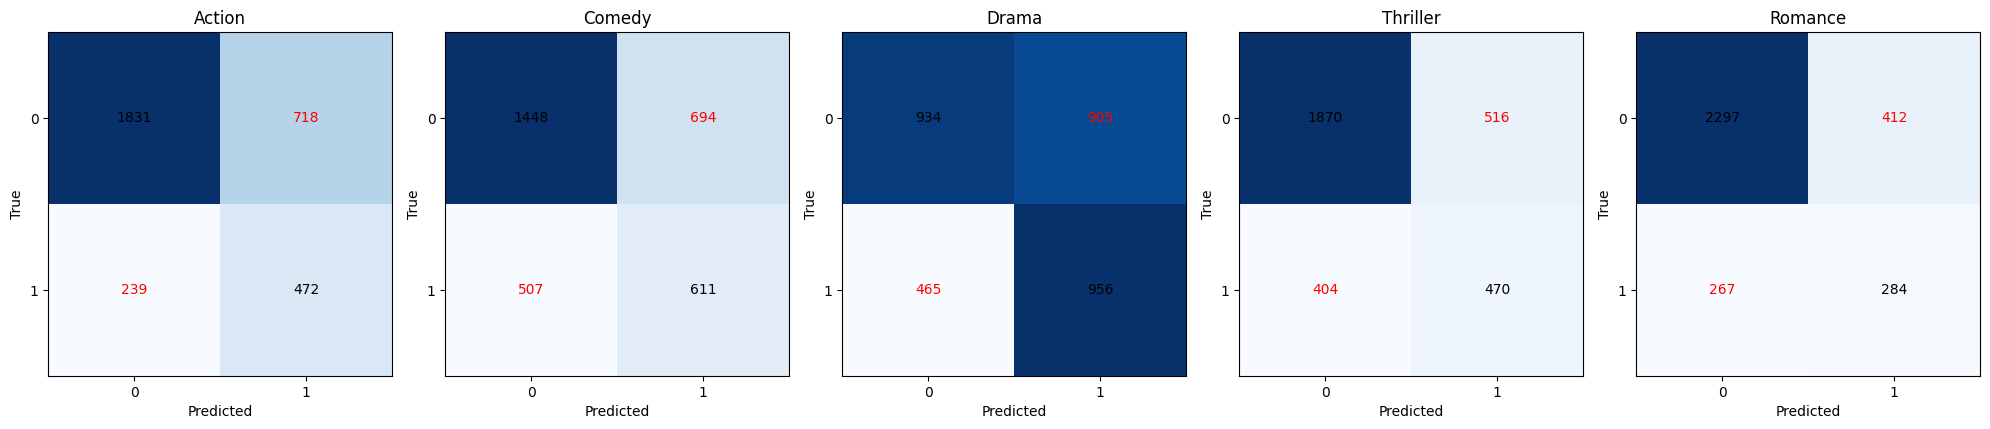

In [23]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

# Define a dictionary to map numeric labels to text labels
label_dict = {0: 'Action', 1: 'Comedy', 2: 'Drama', 3: 'Thriller', 4: 'Romance'}

# Make predictions on the test set
y_pred = model.predict(x_test_selected)

# Convert probability predictions to binary predictions
y_pred_binary = np.round(y_pred)

# Compute the confusion matrix
confusion_mtx = multilabel_confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
for i in range(5):
    cm = confusion_mtx[i]
    ax[i].matshow(cm, cmap='Blues')
    for row in range(cm.shape[0]):
        for col in range(cm.shape[1]):
            if row == col:
                ax[i].text(x=col, y=row, s=cm[row, col], va='center', ha='center')
            else:
                ax[i].text(x=col, y=row, s=cm[row, col], va='center', ha='center', color='red')
    ax[i].set_title(label_dict[i])
    ax[i].set_xlabel('Predicted')
    ax[i].set_ylabel('True')
    ax[i].set_xticks([0, 1])
    ax[i].set_yticks([0, 1])
    ax[i].xaxis.set_ticks_position('bottom')
    ax[i].yaxis.set_ticks_position('left')
plt.tight_layout()
plt.show()
